# Assignment 12 - Non-linear Models

Use `tidyverse` to model a non-linear relationship from the **Auto** dataset provided in the `ISLR2` package.

***
Load the `ISLR2` and `tidyverse` packages.

In [24]:
# Load required libraries
library(ISLR2)
library(tidyverse)
library(tidymodels)


`glimpse` the `Auto` dataset (this comes from the `ISLR2` package).

In [3]:
glimpse(Auto)
Auto |> head()


Rows: 392
Columns: 9
$ mpg          <dbl> 18, 15, 18, 16, 17, 15, 14, 14, 14, 15, 15, 14, 15, 14, 2…
$ cylinders    <int> 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 4, 6, 6, 6, 4, …
$ displacement <dbl> 307, 350, 318, 304, 302, 429, 454, 440, 455, 390, 383, 34…
$ horsepower   <int> 130, 165, 150, 150, 140, 198, 220, 215, 225, 190, 170, 16…
$ weight       <int> 3504, 3693, 3436, 3433, 3449, 4341, 4354, 4312, 4425, 385…
$ acceleration <dbl> 12.0, 11.5, 11.0, 12.0, 10.5, 10.0, 9.0, 8.5, 10.0, 8.5, …
$ year         <int> 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 7…
$ origin       <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, …
$ name         <fct> chevrolet chevelle malibu, buick skylark 320, plymouth sa…


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
,<dbl>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<fct>
1,18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
2,15,8,350,165,3693,11.5,70,1,buick skylark 320
3,18,8,318,150,3436,11.0,70,1,plymouth satellite
4,16,8,304,150,3433,12.0,70,1,amc rebel sst
5,17,8,302,140,3449,10.5,70,1,ford torino
6,15,8,429,198,4341,10.0,70,1,ford galaxie 500


Plot `mpg`  as a function of `displacement`.

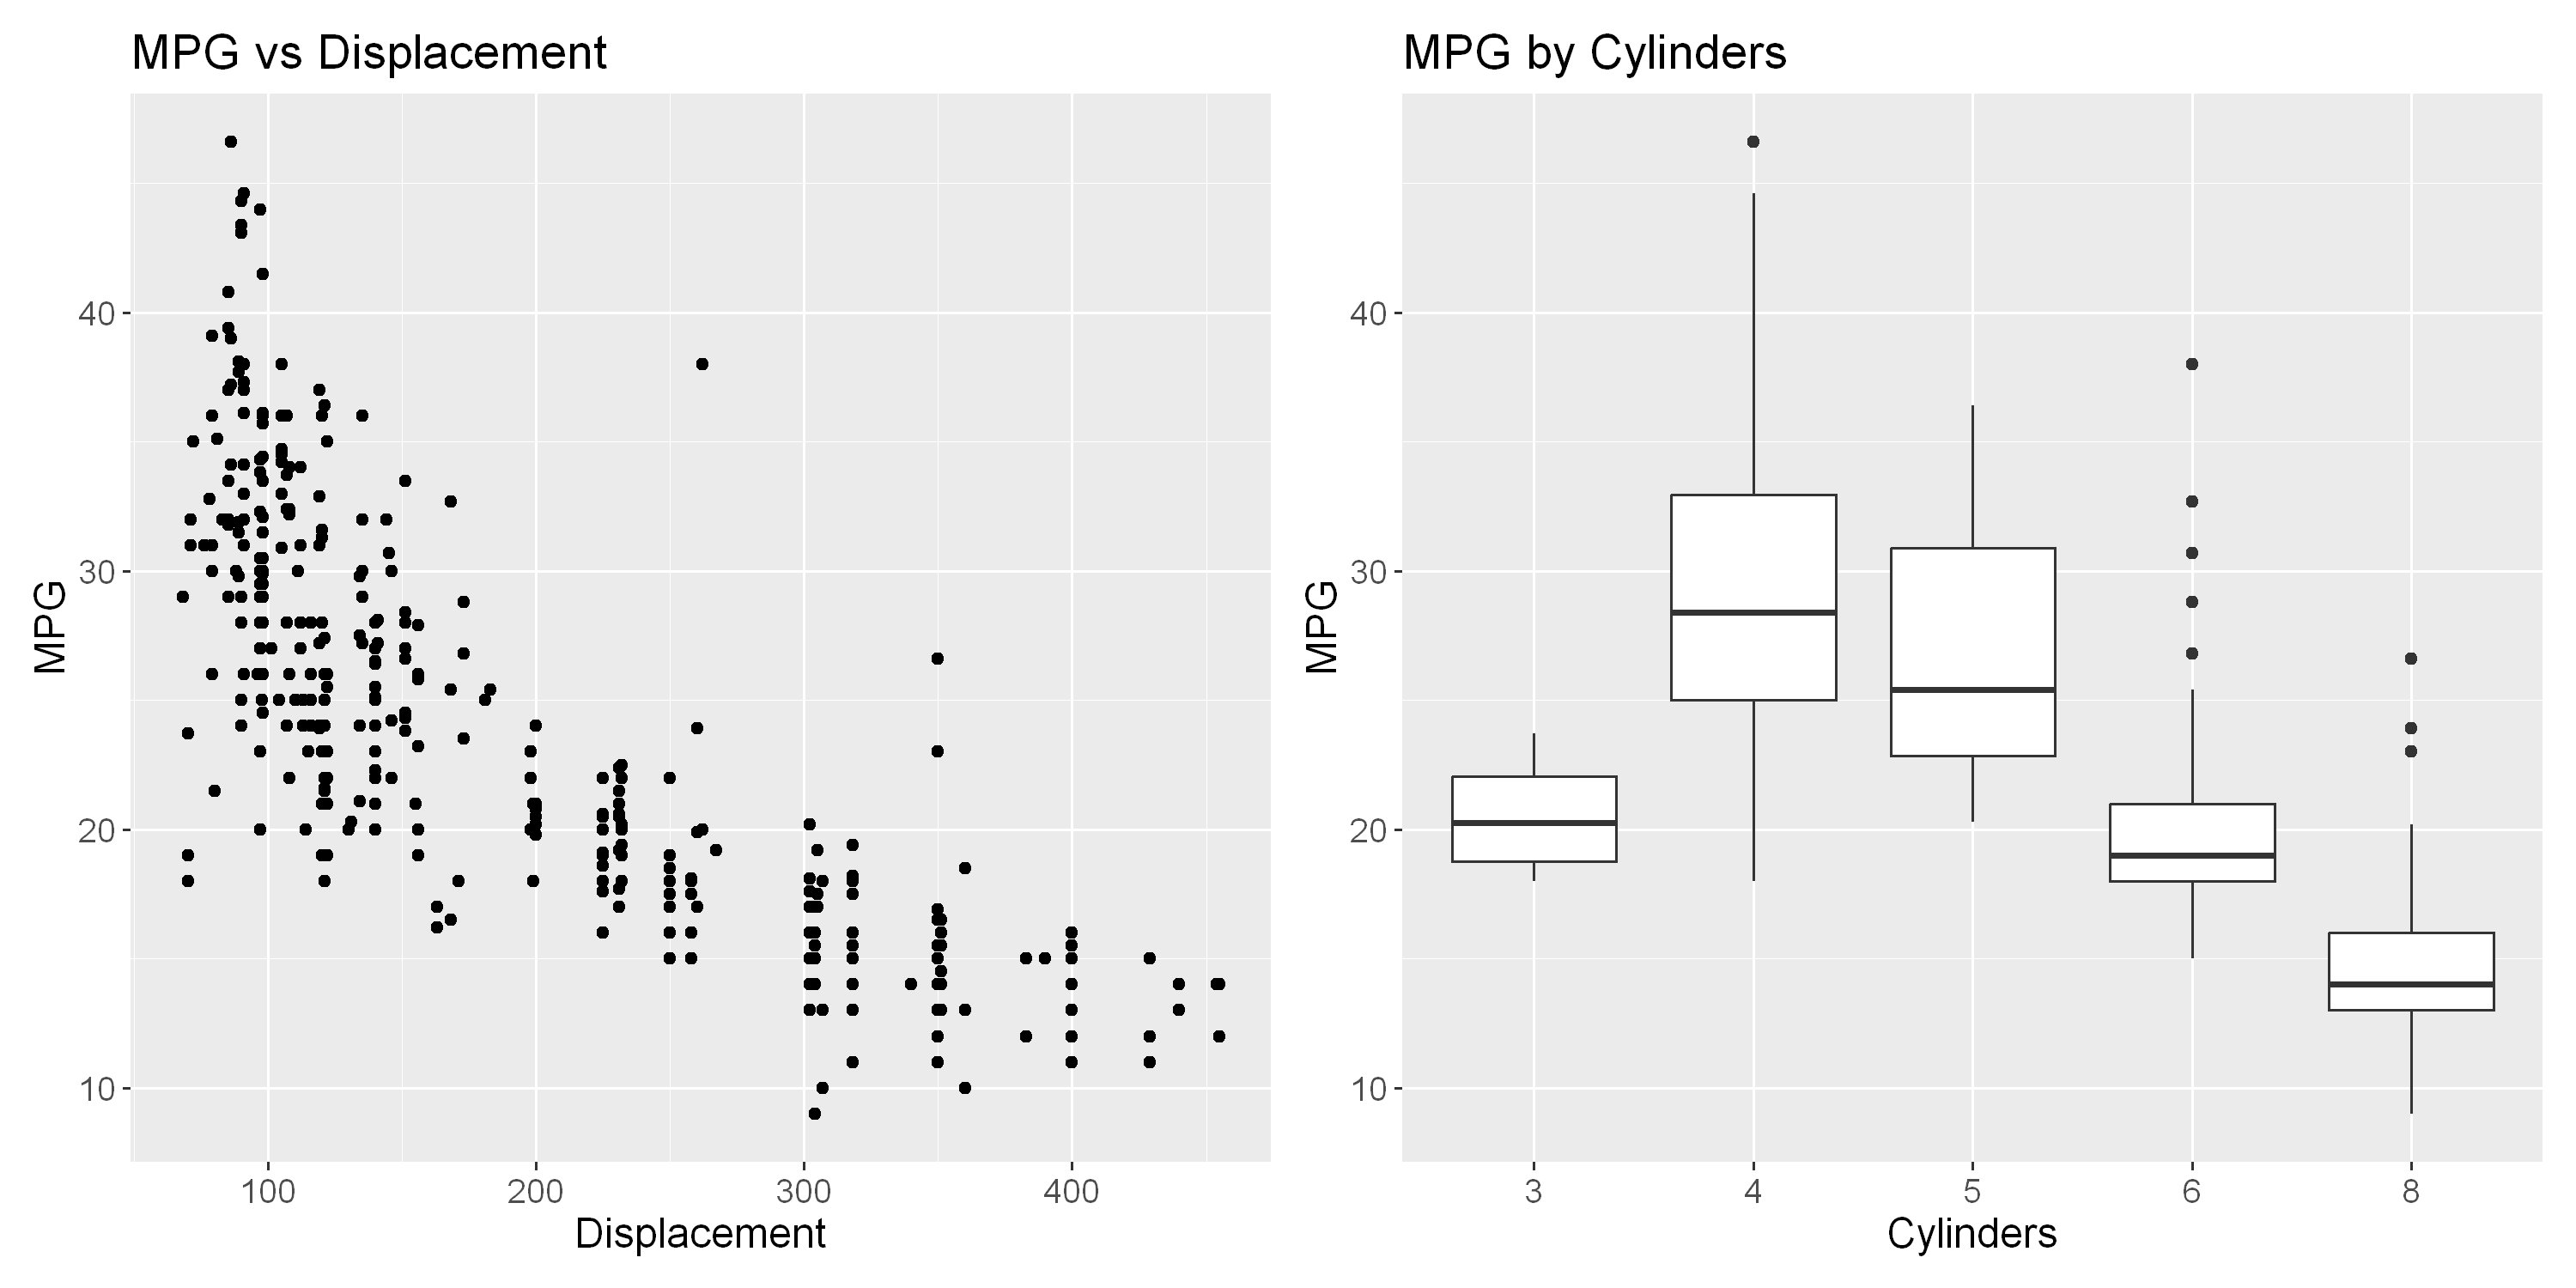

In [ ]:
options(repr.plot.width = 12, repr.plot.height = 6)

# Scatter plot of MPG vs Displacement
p1 <- Auto |> 
    ggplot(aes(x = displacement, y = mpg)) +
    geom_point() +
    labs(title = "MPG vs Displacement", x = "Displacement", y = "MPG") +
    theme(plot.title = element_text(size = 16), text = element_text(size = 14))

# Boxplot of MPG by Cylinders (to visualize the problem below)
p2 <- Auto |> 
    ggplot(aes(x = factor(cylinders), y = mpg)) +
    geom_boxplot() +
    labs(title = "MPG by Cylinders", x = "Cylinders", y = "MPG") +
    theme(plot.title = element_text(size = 16), text = element_text(size = 14))

# Combine the two plots
p1 + p2

❓Does the relationship of `mpg` to `displacement` look linear?

**No**. The relationship appears to be an exponential decay.



***
Model `mpg` as a function of `displacement` and `cylinders`. 

- Transform the `displacement` variable using a `spline` or `polynomial` transform. (Hint: use `step_ns` or `step_poly`).
- Combine `step_mutate(cyl_cat = factor(cylinders))` followed by `step_dummy(cyl_cat)` and `step_rm(cylinders)` to convert `cylinders` to categorical data for the model.

Assuming you name your fitted model `mod_fit` the code below can be used to visualize your model:

```r
predict(mod_fit, rec |> juice()) |>
    bind_cols(Auto) |>
ggplot(aes(x = displacement, y = mpg)) +
    geom_point(size = 1, alpha = 0.35) +
    geom_line(aes(y = .pred, color = factor(cylinders)), linewidth = 1)
```

**Create and visualize your model below...**

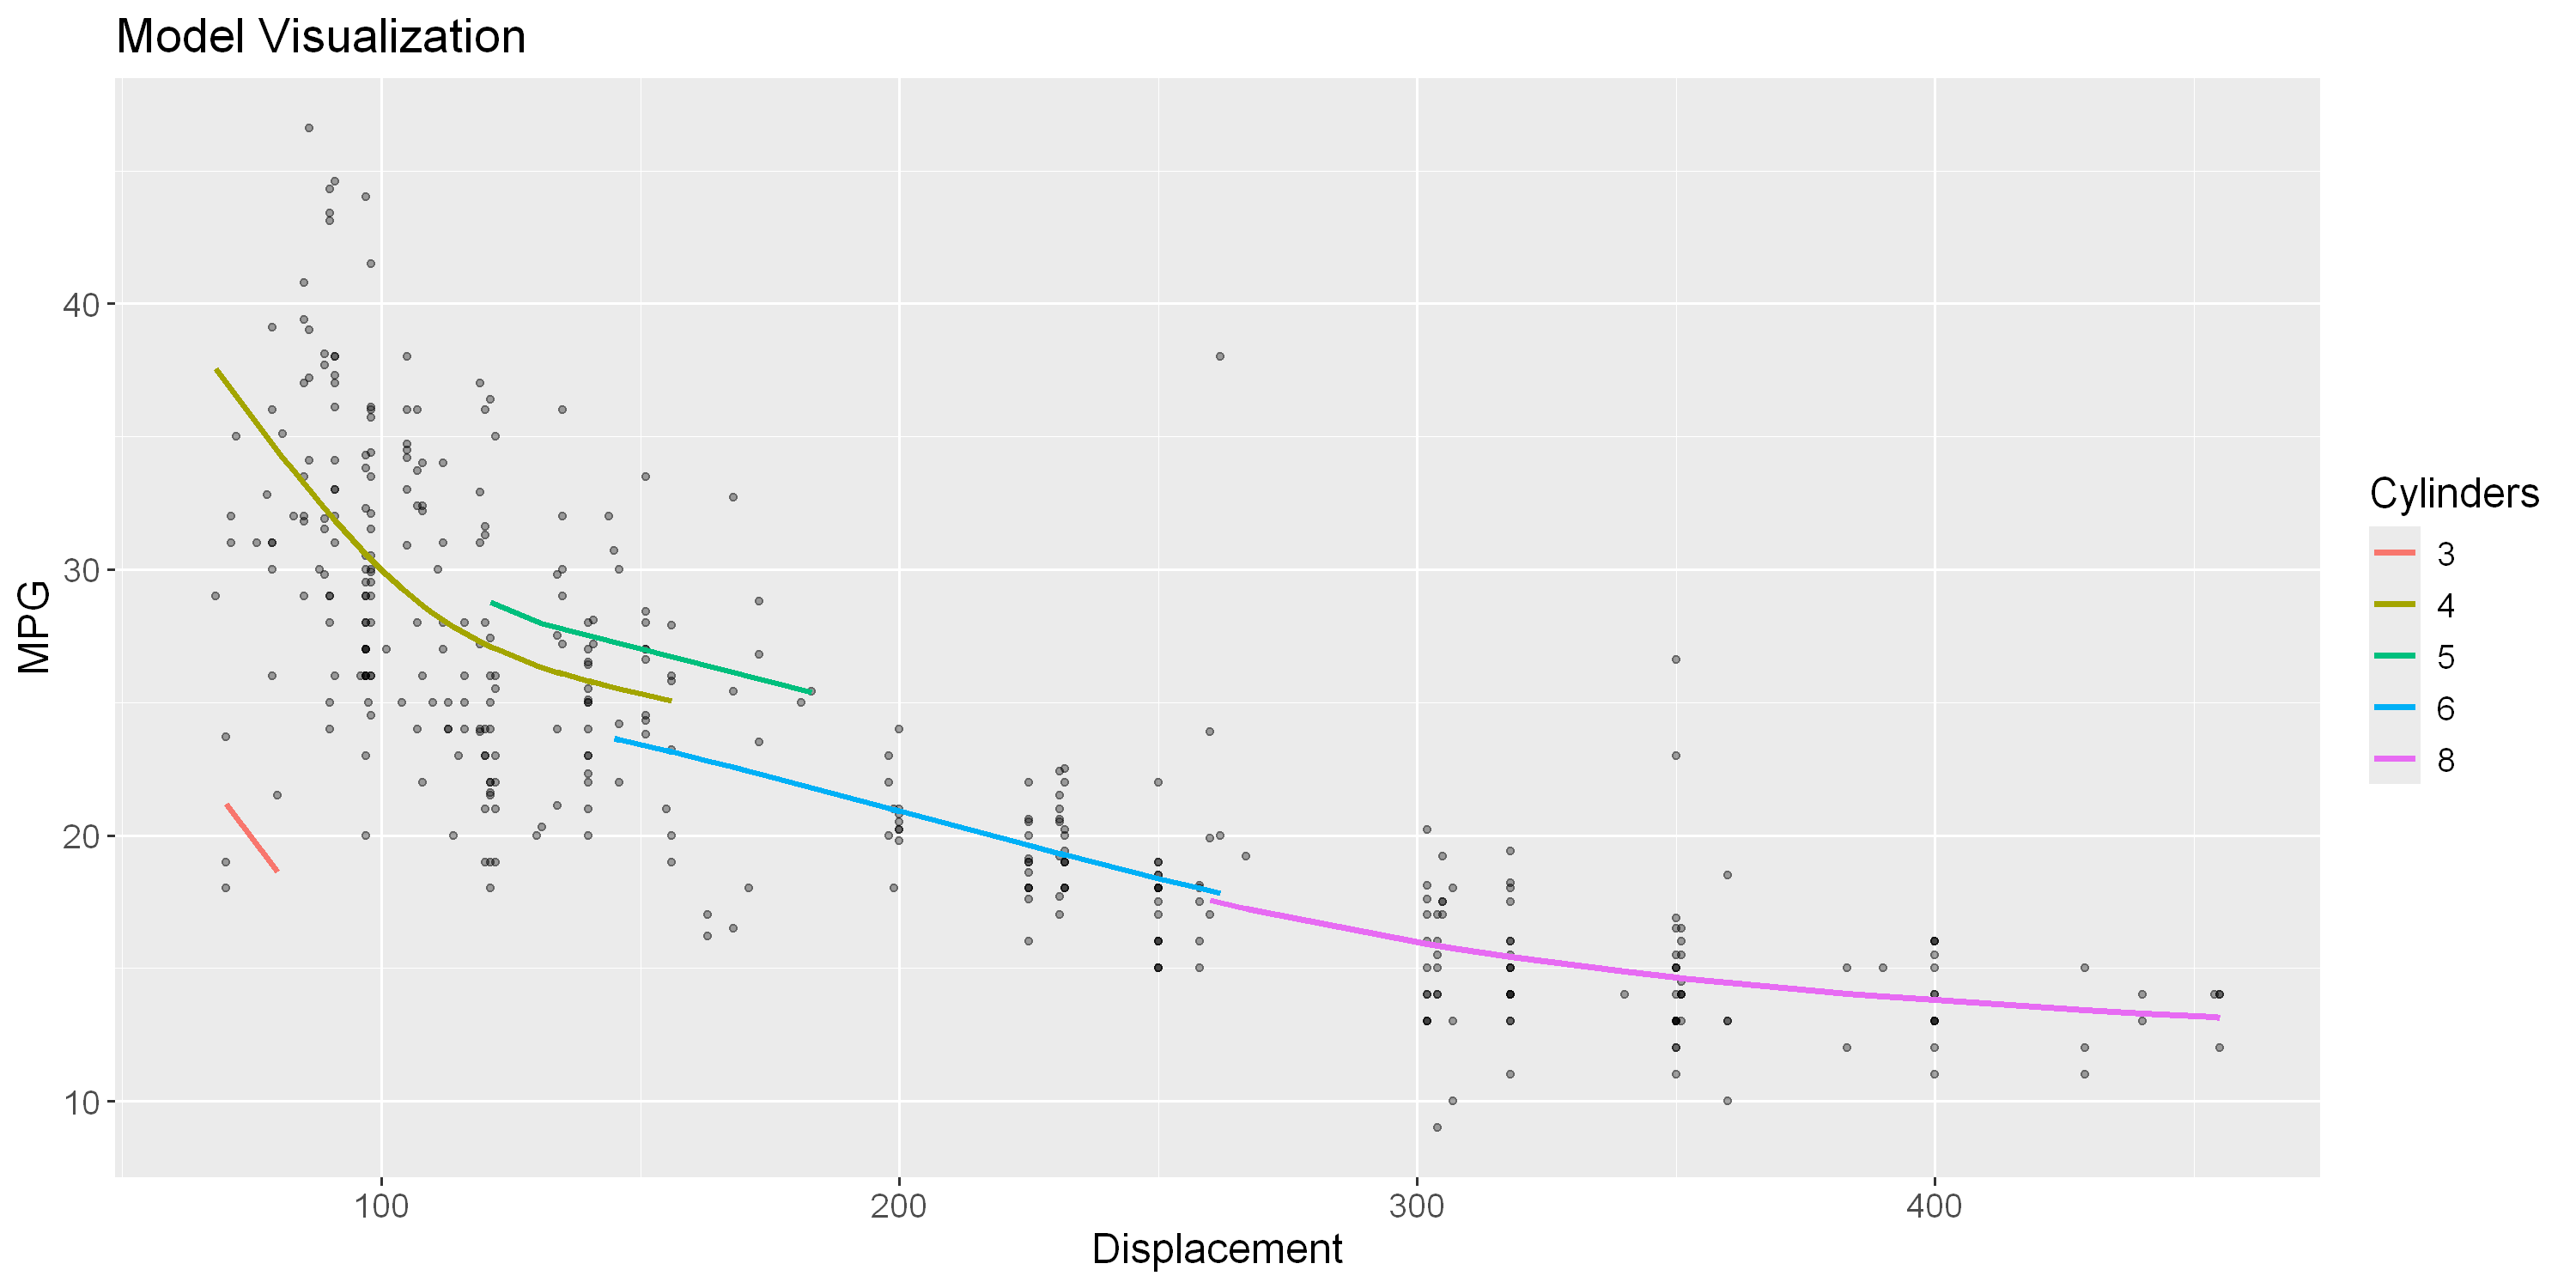

In [25]:

# Create a recipe for the model
rec <- recipe(mpg ~ displacement + cylinders, data = Auto) |>
    step_ns(displacement, deg_free = 4) |> 
    step_mutate(cyl_cat = factor(cylinders)) |> 
    step_dummy(cyl_cat) |> 
    step_rm(cylinders) |>
    prep()

# Define a linear regression model
mod <- linear_reg() |> 
    set_engine("lm")

# Fit the model
mod_fit <- mod |> 
    fit(mpg ~ ., data = rec |> juice())

# Visualize the model
predict(mod_fit, rec |> juice()) |>
    bind_cols(Auto) |>
ggplot(aes(x = displacement, y = mpg)) +
    geom_point(size = 1, alpha = 0.35) +
    geom_line(aes(y = .pred, color = factor(cylinders)), linewidth = 1) +
    labs(title = "Model Visualization", x = "Displacement", y = "MPG", color = "Cylinders") +
    theme(plot.title = element_text(size = 16), text = element_text(size = 14))



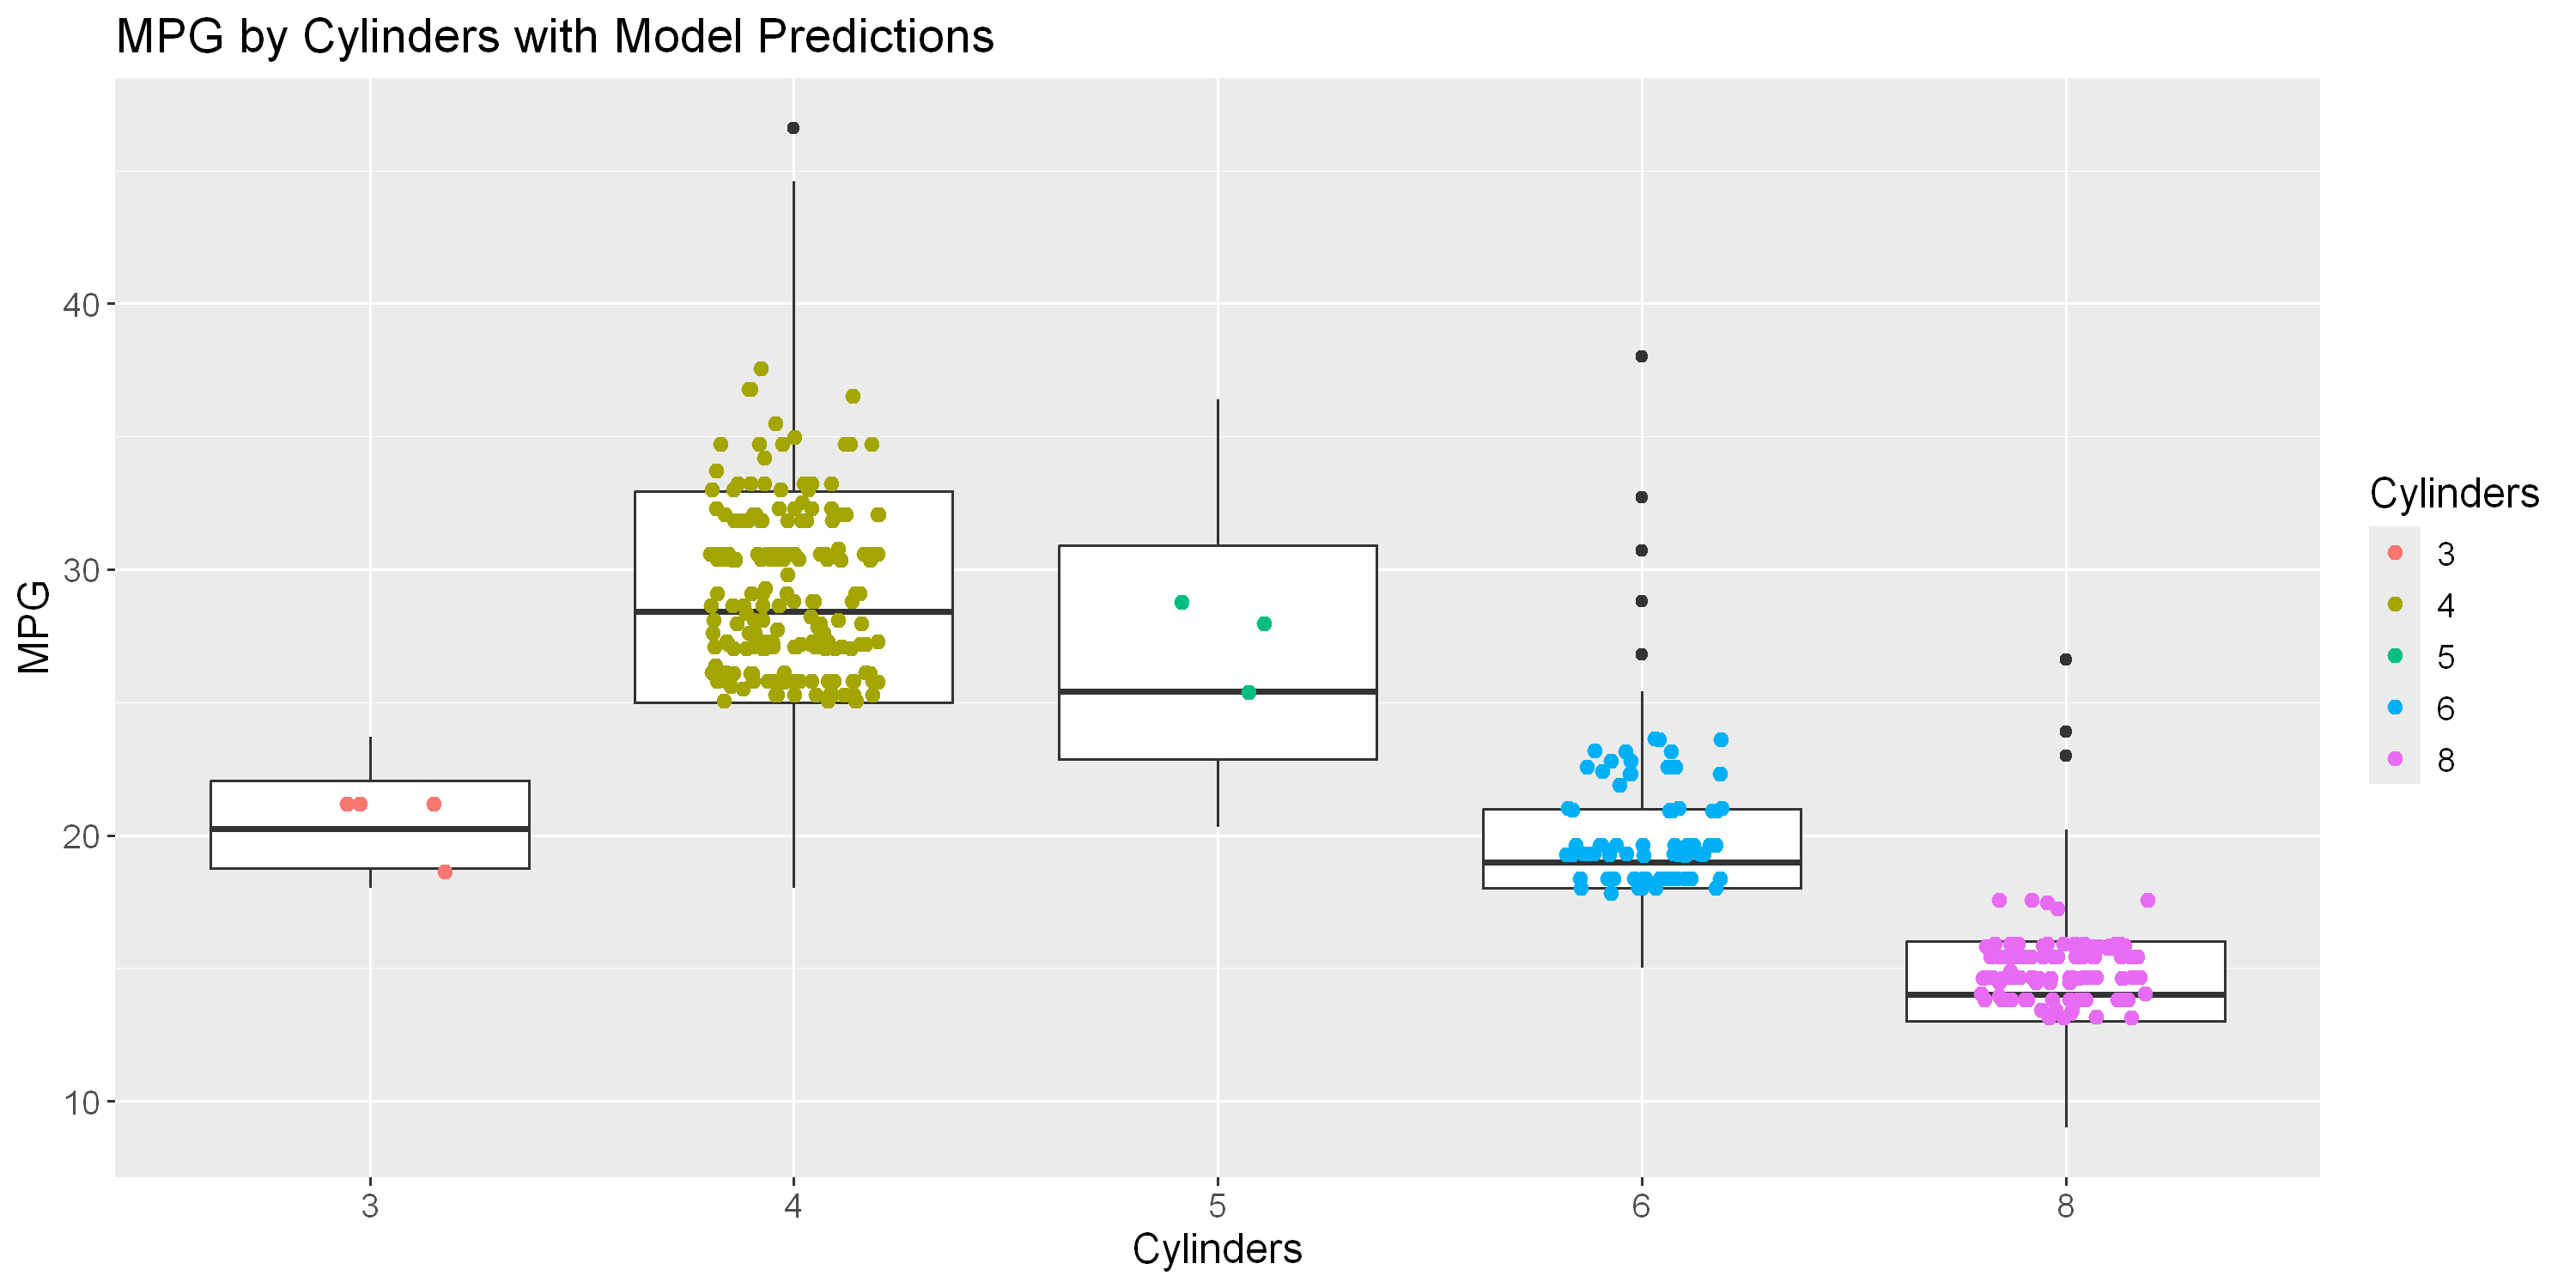

In [26]:
# Predict mpg using the fitted model
predicted_data <- predict(mod_fit, rec |> juice()) |>
    bind_cols(Auto)

# Boxplot of MPG by Cylinders with model predictions
predicted_data |>
    ggplot(aes(x = factor(cylinders), y = mpg)) +
    geom_boxplot() +
    geom_point(aes(y = .pred, color = factor(cylinders)), position = position_jitter(width = 0.2), size = 2) +
    labs(title = "MPG by Cylinders with Model Predictions", x = "Cylinders", y = "MPG", color = "Cylinders") +
    theme(plot.title = element_text(size = 16), text = element_text(size = 14))